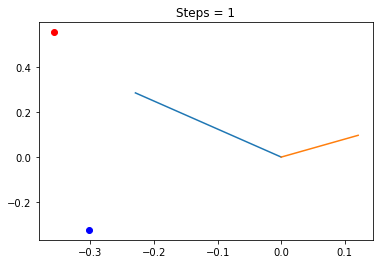

min1 -0.8915567274589397
max1 -0.49186907506778615
min2 -2.4690583833381563
max2 3.0630542501112914
mid1a -0.6570027263393611
mid2a 3.012719081568401


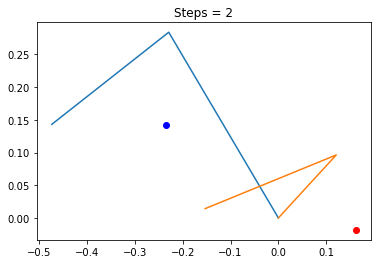

min1 -0.3820698752144684
max1 -0.07853840347850172
min2 -0.09289477043958791
max2 2.7595227783753247
mid1a -0.6427540110273211
mid2a 2.5148161525676134
min1 -1.770271907625531
max1 -0.07853840347850172
min2 -0.3251648980419058
max2 2.7595227783753247
mid1a -0.6427540110273211
mid2a 1.8833361284088488


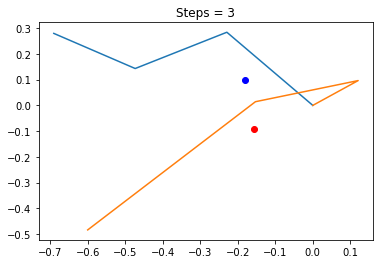

min1 -0.45818791318262325
max1 -0.2219337130116347
min2 0.6779156821841265
max2 1.3713207459642622
mid1a -0.6575300975179071
mid2a 1.172978472083034
min1 -1.452819776592577
max1 -0.2219337130116347
min2 0.6779156821841265
max2 1.6887728769972163
mid1a -0.6575300975179071
mid2a 1.1580704039441867
min1 -1.452819776592577
max1 -0.2219337130116347
min2 0.6779156821841265
max2 1.6887728769972163
mid1a -0.6575300975179071
mid2a 1.2900748697588449


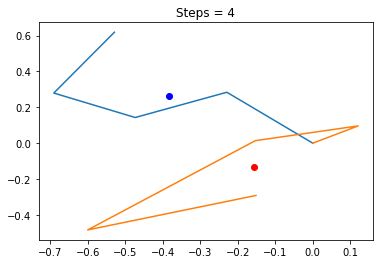

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

N = 5 # number of steps
w = 2 # number of walkers
noutput = 4 # determins number of graphs

# From stack exchange, create function which can calculate the angle between line and x-axis

def angle_trunc(a):
    while a < 0.0:
        a += pi * 2
    return a

def AngleBtwPt(x_orig, y_orig, x_landmark, y_landmark):
    deltaY = y_landmark - y_orig
    deltaX = x_landmark - x_orig
    return angle_trunc(math.atan2(deltaY, deltaX)) # got rid of angle_trunc

# walker 1
w1 = [[0,0]]

# walker 2
w2 = [[0,0]]

# creating list of walkers
a = [w1,w2]

# angle list (one for each walker)
angles1 = []
angles2 = []


for iN in range(1,N):
    
    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
    
    # removes "memory" of previous step
    
    angles1.clear()
    angles2.clear()
        
    for ik in range(1,iN): # ik = i check # for other avoidance # angles are being recalculated, so I might be able to decrease run time if I figure out how
        
        for it in range(ik + 2): # calculate angles and find the max and min for w1          
        
            theta1 = AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w2[it][0],w2[it][1])
            angles1.append(theta1)
        
            dthetamax1 = np.max(angles1)
            dthetamin1 = np.min(angles1)
            
        for it in range(ik + 2): # calculate angles and find the max and min for w2
        
            theta2 = AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w1[it][0],w1[it][1])
            angles2.append(theta2)
        
            dthetamax2 = np.max(angles2)
            dthetamin2 = np.min(angles2)
            
        print("min1",dthetamin1)
        print("max1",dthetamax1)
        print("min2",dthetamin2)
        print("max2",dthetamax2)
            
        if iN == 1:
            
            if (dthetamax1 - dthetamin1) < np.pi:
                           
                while dthetamin1 <= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) <= dthetamax1:

                    w1.pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])
                    
            else:
                
                while dthetamin1 >= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) or dthetamax1 <= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]):

                    w1.pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])
                
            if (dthetamax2 - dthetamin2) < np.pi:
                           
                while dthetamin2 <= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) <= dthetamax2:

                    w2.pop()

                    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
                    
            else:
                
                while dthetamin2 >= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) or dthetamax2 <= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]):

                    w2.pop()

                    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
        
        else:
            
            x1c, y1c = zip(*w1)
            x2c, y2c = zip(*w2)
            x1c = sum(x1c)/(iN + 1)
            y1c = sum(y1c)/(iN + 1)
            x2c = sum(x2c)/(iN + 1)
            y2c = sum(y2c)/(iN + 1)
            
            print("mid1a",AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],x2c,y2c))
            print("mid2a",AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],x1c,y1c))
        
            if dthetamin1 <= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],x2c,y2c) <= dthetamax1:

                while dthetamin1 <= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) <= dthetamax1: # checks if w1 ran into w2

                    w1.pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

            else:

                while AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) >= dthetamax1 or AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) <= dthetamin1: # checks if w1 ran into w2

                    w1.pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

            if dthetamin2 <= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],x1c,y1c) <= dthetamax2:  

                while dthetamin2 <= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) <= dthetamax2: # checks if w2 ran into w1

                    w2.pop()

                    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])

            else:

                while AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) >= dthetamax2 or AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) <= dthetamin2: # checks if w2 ran into w1

                    w2.pop()

                    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])

#         for ic in range(1,iN - 1): # for self avoidance

#             while math.dist(w1[iN],w1[ic]) < rs: # checks if w1 ran into w1

#                 w1.pop()

#                 d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
#                 w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

#             while math.dist(w2[ic],w2[iN]) < rs: # checks if w2 ran into w2

#                 w2.pop()

#                 d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
#                 w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
                
    # plot the positions of both walkers
    x1, y1 = zip(*w1)
    x2, y2 = zip(*w2)
        
    #if (mod(iN,noutput)==0):
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.plot(x2c,y2c,'or')
    plt.plot(x1c,y1c,'ob')
    plt.title('Steps = ' + str(iN))
    plt.show()

In [ ]:
# Code below is just me printing statements to debug/understand code

In [ ]:
w1[:3]

In [ ]:
q = 0.1235574126459641+-0.3638591556399068
q/3

In [ ]:
sum

In [ ]:
q/3

In [8]:
AngleBtwPt(0,0,-.5,-.5)

-2.356194490192345

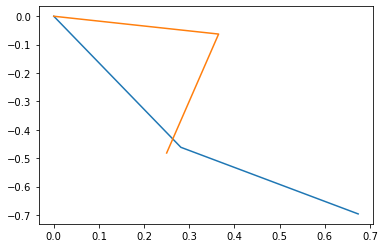

In [10]:
plt.plot(x1[:3],y1[:3])
plt.plot(x2[:3],y2[:3])
# plt.plot(-0.09526673671627757,-0.0801005809979809,'ob')
# plt.plot(x2c,y2c,'or')
plt.show()